# Simple analogue filters

How to define analogue filters using the `scipy.signal` module.
<br>
And use it to do signal processing with sounds.
<br>
<br>
Date Created: 15 Aug 2024
<br>
Last Modified: 15 Aug 2024
<br>
Humans Responsible: JC

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

from IPython.display import Image, Audio

font_size = 16
plt.rcParams.update({'font.size': font_size})

# A simple filter


In [2]:
from scipy import signal

R = 100
C = 8.5e-6

numerator   = [1]
denominator = [R*C, 1]

cct = signal.TransferFunction(numerator, denominator)

omega, mag, phase = signal.bode(cct)

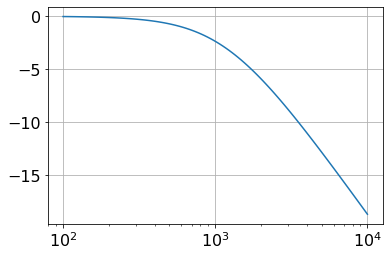

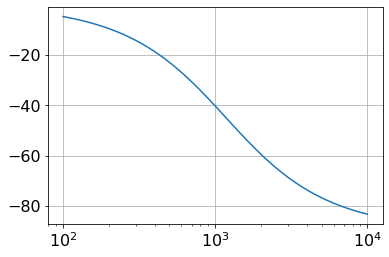

In [3]:
# Bode magnitude plot
plt.figure()
plt.semilogx(omega, mag)
plt.grid()

# Bode phase plot
plt.figure()
plt.semilogx(omega, phase)
plt.grid()
plt.show()

# A violin with noise

In [4]:
fs, signal_violin = wavfile.read("data_simple_filter/violin_fs=16kHz.wav")

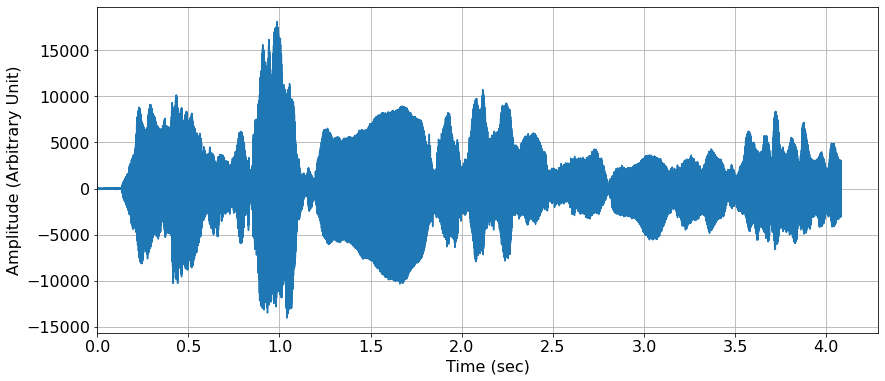

In [5]:
signal_violin = signal_violin.astype(np.float64)
t = np.arange(0, len(signal_violin)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, signal_violin)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [8]:
Audio(signal_violin, rate=fs)

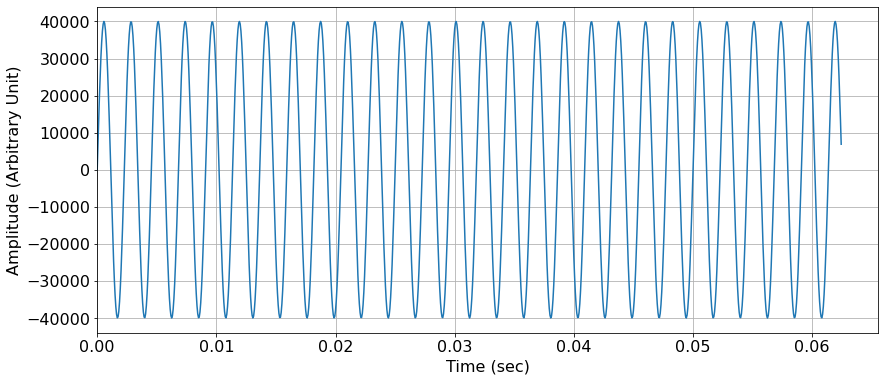

In [9]:
tone = 40000*np.sin(2*np.pi*440*t)

plt.figure(figsize=(14,6))
plt.plot(t[0:1000], tone[0:1000])
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [10]:
Audio(tone, rate=fs)

In [11]:
signal_sum = signal_violin + tone

In [12]:
Audio(signal_sum, rate=fs)

In [13]:
R = 100
L = 18.1e-3
C = 7.2e-6

numerator = [1,0,1/(L*C)]
denominator = [1, R/L, 1/(L*C)]

cct = signal.TransferFunction(numerator, denominator)

omega, mag, phase = signal.bode(cct)

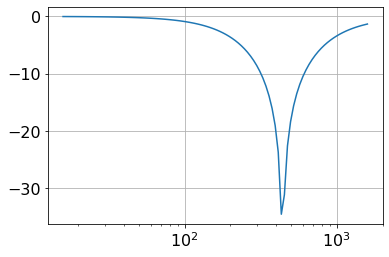

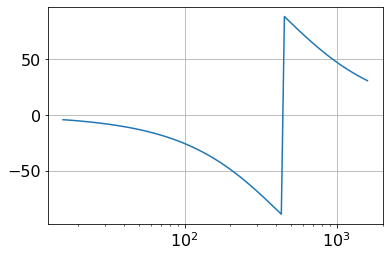

In [14]:
# Bode magnitude plot
plt.figure()
plt.semilogx(omega/(2*np.pi), mag)
plt.grid()

# Bode phase plot
plt.figure()
plt.semilogx(omega/(2*np.pi), phase)
plt.grid()
plt.show()

In [15]:
tout, signal_sum_filtered, xout = cct.output(signal_sum,t)
Audio(signal_sum_filtered, rate=fs)

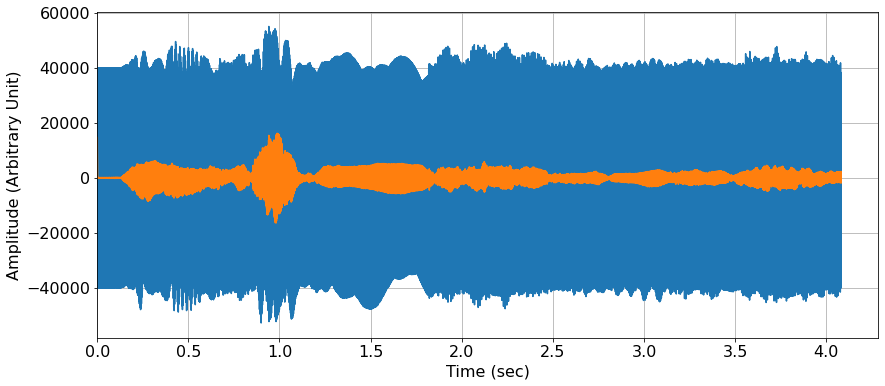

In [16]:
plt.figure(figsize=(14,6))
plt.plot(t, signal_sum)
plt.plot(t, signal_sum_filtered)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()